# softmax vs Fancy Softmax의 차이

## 참고자료
https://stackoverflow.com/questions/35976954/calculating-cross-entropy-manually-vs-using-softmax-cross-entropy-with-logits-in?rq=1<br>
https://github.com/AliAbbasi/Numerically-Stable-Cross-Entropy-Loss-Function-Tensorflow

In [38]:
import numpy as np
import tensorflow as tf
from IPython.display import Image

In [49]:
logits = np.array([1000, 2500], dtype=np.float32)
labels = np.array([0   , 0   ], dtype=np.float32)
    
with tf.Session() as sess:
    print ("라이브러리로 구현",tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits( logits= logits, labels= labels )).eval())
    softed = tf.nn.softmax(logits)
    print("직접구현",-tf.reduce_sum(labels * tf.log(softed)).eval())
    
    
    print("\n<nan이 나오는 이유>")
    print("softmax시의 값",softed.eval())
    print("-log(x)에 넣었을 때의 값",-tf.log(softed).eval())
    print("크로스 엔트로피 할시의 값",labels * tf.log(softed).eval())
    
    

라이브러리로 구현 0.0
직접구현 nan

<nan이 나오는 이유>
softmax시의 값 [0. 1.]
-log(x)에 넣었을 때의 값 [inf -0.]
크로스 엔트로피 할시의 값 [nan  0.]


/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


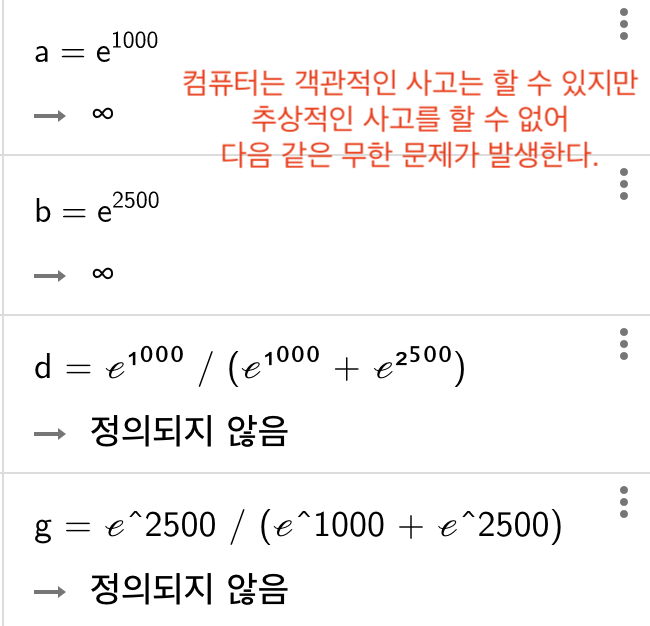

In [45]:
Image("Image/softmax의 문제점.png",width=600)

## 따라서 직접 구현하는 것 대신 tensorflow에서 제공하는 함수를 써야한다.